**Python Implementation of Principal Component Analysis (PCA) for Dimensionality Reduction**

 _Dataset: Wisconsin Breast Cancer_

Comments in Japanese:
主成分分析（PCA）による次元削減をPythonで実装する
（詳細はテキストRaschka『Python機械学習プログラミング』5章）
 以下のコードはテキストのコンパクト版、データは乳がんデータ


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load breast cancer data (30 variables as features and class labels)
# 乳がんデータを読み込む（クラスラベルと特徴量である30個の変数）
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' 
                 'breast-cancer-wisconsin/wdbc.data',header=None)

In [2]:
# Specify the 30 features as the explanatory variables （30個の特徴量を説明変数に指定）
# For the target variable,convert class labels
# Malignant (M) = 1 and Benign (B) = 0
# 目的変数のクラスラベル（悪性M,良性B）を１,０に変換
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [3]:
# Standardize (rescale) the explanatory variables
# 説明変数の標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [4]:
# Dimensionality reduction
# Specify the number of principal components (2 adopted here) and create PCA instance
# 次元削減
# 主成分の数(ここでは2個）を指定して、PCAのインスタンス生成
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

In [5]:
# Add labels to columns： PC1 and PC2 for the first and second columns
# 列にラベルをつける、1つ目が第1主成分、2つ目が第2主成分
X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
# Concatenate the above data with the original data's target variable (Class label)
# 上のデータを元のデータの目的変数（Class label)の横に結合
classlabel = pd.DataFrame(y, columns=['Class label'])
X_pca = pd.concat([X_pca, classlabel], axis=1)

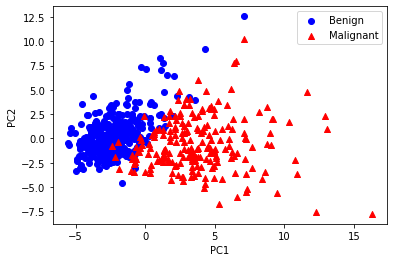

In [6]:
# Scatter plot for visualization
# 散布図による, 嬉しい可視化
plt.scatter(X_pca.loc[X_pca['Class label']==0,'PC1'], X_pca.loc[X_pca['Class label']==0,'PC2'],
            color='blue', marker='o', label='Benign')
plt.scatter(X_pca.loc[X_pca['Class label']==1,'PC1'], X_pca.loc[X_pca['Class label']==1,'PC2'],
            color='red', marker='^', label='Malignant')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')
plt.show()

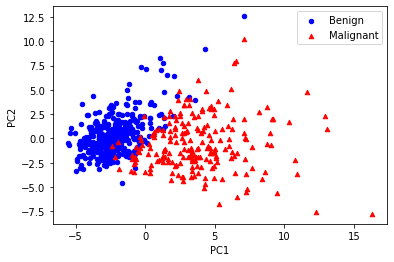

In [7]:
# An alternative way of producing scatter plot
# Separate malignant and benign
# 散布図作成の他の方法
# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['Class label']==1]
pca_benign = X_pca[X_pca['Class label']==0]
# 良性をプロット
ax = pca_benign.plot.scatter(x='PC1', y='PC2', color='blue', marker='o', label='Benign');
# 悪性をプロット
pca_malignant.plot.scatter(x='PC1', y='PC2', color='red', marker='^',label='Malignant',ax=ax);


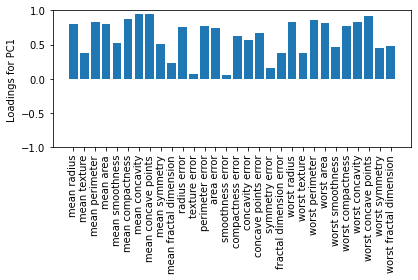

In [8]:
# Visualize how much each original feature contributes to the first principal component
# 次元削減で作成された第１主成分に、元の特徴量が各々どのくらい寄与しているか、可視化
df.columns = ['ID','class label','mean radius', 'mean texture', 'mean perimeter','mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
sklearn_loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(30), sklearn_loadings[:,0], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(30))
ax.set_xticklabels(df.columns[2:],rotation=90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

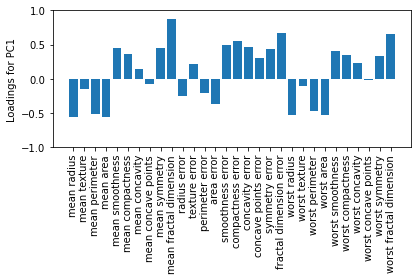

In [9]:
# Contributions to the second principal component
# 第2主成分について
sklearn_loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(30), sklearn_loadings[:,1], align='center')
ax.set_ylabel('Loadings for PC1')
ax.set_xticks(range(30))
ax.set_xticklabels(df.columns[2:],rotation=90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

In [10]:
# （折角、前処理した）データ、csvで保存
# X_pca.to_csv('Xpcadata.csv')